##Introduction

This project deals with the problem of predicting readmissions to a health care facility (hospital). The dataset used in the project contains a number of columns containing various information about the condition of patients and medical records. The "readmitted" column contains information whether a patient was readmitted to hospital in less than 30 days, after more than 30 days or not to be hospitalized again.

The aim of the project is to create a model that, based on patient data, will effectively predict whether such a person will be hospitalized in less than 30 days after leaving the hospital, longer than 30 days or not.



##Importing libraries

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Uploading a data file

In [8]:
diab=pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')

##Checking information about the dataset, data analysis, data processing




In [9]:
diab.shape

(101766, 50)

In [10]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [11]:
# displaying all columns
pd.set_option('display.max_columns', None)

In [12]:
diab.head(9)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
# statistics
diab.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [14]:
# checking which classes will be predicted by the model
diab['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [15]:
# checking the number of rows of each class
diab['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [16]:
diab2 = diab

In [17]:
# count check "?" in individual columns
for col in diab2.columns:
    if diab2[col].dtype == object:
         print(col,diab2[col][diab2[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [18]:
# removing the 'weight','payer_code','medical_specialty' columns that are mostly "?"
diab2 = diab2.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [19]:
# deleting rows where all diagnosis columns have "?"
# deleting rows with values ​​11, 19, 20 in the 'discharge_disposition_id' column - marked as expired, documentation expired -> patient died (impossible for him/her to be hospitalized again)
# deleting rows with value 'Unknown/Invalid' in column 'gender' -> only few rows

drop_2 = set(diab2[(diab2['diag_1'] == '?') & (diab2['diag_2'] == '?') & (diab2['diag_3'] == '?')].index)
drop_1 = drop_2.union(set(diab2[diab2['discharge_disposition_id'] == 11].index))
drop_3 = drop_2.union(set(diab2[diab2['discharge_disposition_id'] == 19].index))
drop_4 = drop_2.union(set(diab2[diab2['discharge_disposition_id'] == 20].index))
drop_5 = drop_2.union(set(diab2['gender'][diab2['gender'] == 'Unknown/Invalid'].index))
drop_2 = list(set(diab2.index) - set(drop_1) - set(drop_3) - set(drop_4) - set(drop_5))
diab2 = diab2.iloc[drop_2]

In [20]:
diab2['discharge_disposition_id']

0         25
1          1
2          1
3          1
4          1
          ..
101761     3
101762     4
101763     1
101764     3
101765     1
Name: discharge_disposition_id, Length: 100110, dtype: int64

In [21]:
# removing three columns - 'citoglipton', 'examide', 'glimepiride-pioglitazone', they have the same values ​​for all rows 
diab2 = diab2.drop(['citoglipton', 'examide', 'glimepiride-pioglitazone'], axis = 1)

In [22]:
# removing duplicates (rows with the same values ​​in the patient_nbr column refer to the same patient)
diab3 = diab2.drop_duplicates(subset=['patient_nbr'], keep='first')

In [23]:
diab3

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,None,>7,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO


In [24]:
# creating a list with column names, which will be converted to a numeric type (0, 1)
names = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [25]:
for c in names:
    column_name = str(c) + 'temp'
    diab3[column_name] = diab3[c].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)


<ipython-input-25-bcc128816b77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab3[column_name] = diab3[c].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
<ipython-input-25-bcc128816b77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab3[column_name] = diab3[c].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
<ipython-input-25-bcc128816b77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [26]:
diab3.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,metformintemp,repaglinidetemp,nateglinidetemp,chlorpropamidetemp,glimepiridetemp,glipizidetemp,glyburidetemp,pioglitazonetemp,rosiglitazonetemp,acarbosetemp,miglitoltemp,insulintemp,glyburide-metformintemp,tolazamidetemp,metformin-pioglitazonetemp,metformin-rosiglitazonetemp,glipizide-metformintemp,troglitazonetemp,tolbutamidetemp,acetohexamidetemp
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# similar operation as above, conversion to numerical values
for c in names:
    diab3[c] = diab3[c].replace('No', 0)
    diab3[c] = diab3[c].replace('Steady', 1)
    diab3[c] = diab3[c].replace('Up', 1)
    diab3[c] = diab3[c].replace('Down', 1) 

diab3['A1Cresult'] = diab3['A1Cresult'].replace('>7', 1)
diab3['A1Cresult'] = diab3['A1Cresult'].replace('>8', 1)
diab3['A1Cresult'] = diab3['A1Cresult'].replace('Norm', 0)
diab3['A1Cresult'] = diab3['A1Cresult'].replace('None', -1) 


diab3['max_glu_serum'] = diab3['max_glu_serum'].replace('>200', 1)
diab3['max_glu_serum'] = diab3['max_glu_serum'].replace('>300', 1)
diab3['max_glu_serum'] = diab3['max_glu_serum'].replace('Norm', 0)
diab3['max_glu_serum'] = diab3['max_glu_serum'].replace('None', -1)


<ipython-input-27-cf00b9bb1a71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab3[c] = diab3[c].replace('No', 0)
<ipython-input-27-cf00b9bb1a71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab3[c] = diab3[c].replace('Steady', 1)
<ipython-input-27-cf00b9bb1a71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [28]:
diab3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70435 entries, 0 to 101765
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   encounter_id                 70435 non-null  int64 
 1   patient_nbr                  70435 non-null  int64 
 2   race                         70435 non-null  object
 3   gender                       70435 non-null  object
 4   age                          70435 non-null  object
 5   admission_type_id            70435 non-null  int64 
 6   discharge_disposition_id     70435 non-null  int64 
 7   admission_source_id          70435 non-null  int64 
 8   time_in_hospital             70435 non-null  int64 
 9   num_lab_procedures           70435 non-null  int64 
 10  num_procedures               70435 non-null  int64 
 11  num_medications              70435 non-null  int64 
 12  number_outpatient            70435 non-null  int64 
 13  number_emergency             7

In [29]:
diab3['miglitol'].value_counts()

0    70415
1       20
Name: miglitol, dtype: int64

In [30]:
# deleting columns temporarily created a few cells above
diab3 = diab3.drop(['metformintemp', 'repaglinidetemp', 'nateglinidetemp', 'chlorpropamidetemp', 'glimepiridetemp', 'glipizidetemp', 'glyburidetemp', 
        'pioglitazonetemp', 'rosiglitazonetemp', 'acarbosetemp', 'miglitoltemp', 'insulintemp', 'glyburide-metformintemp', 'tolazamidetemp', 
        'metformin-pioglitazonetemp','metformin-rosiglitazonetemp', 'glipizide-metformintemp', 'troglitazonetemp', 'tolbutamidetemp', 'acetohexamidetemp'], axis = 1)

In [31]:
diab3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70435 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              70435 non-null  int64 
 1   patient_nbr               70435 non-null  int64 
 2   race                      70435 non-null  object
 3   gender                    70435 non-null  object
 4   age                       70435 non-null  object
 5   admission_type_id         70435 non-null  int64 
 6   discharge_disposition_id  70435 non-null  int64 
 7   admission_source_id       70435 non-null  int64 
 8   time_in_hospital          70435 non-null  int64 
 9   num_lab_procedures        70435 non-null  int64 
 10  num_procedures            70435 non-null  int64 
 11  num_medications           70435 non-null  int64 
 12  number_outpatient         70435 non-null  int64 
 13  number_emergency          70435 non-null  int64 
 14  number_inpatient     

In [32]:
# indexing and categorization of 'race', 'gender', 'age' columns
diab3['race'] = diab3['race'].astype('category').cat.codes
diab3['gender'] = diab3['gender'].astype('category').cat.codes
diab3['age'] = diab3['age'].astype('category').cat.codes


In [33]:
# indexing and categorization of 'change', 'diabetesMed' columns
diab3['change'] = diab3['change'].astype('category').cat.codes
diab3['diabetesMed'] = diab3['diabetesMed'].astype('category').cat.codes

In [34]:
# decision to remove columns 'diag_1', 'diag_2', 'diag_3' -> too much variety and spread; too little knowledge on my part about foreign numbering standards for specific diagnoses
# in case we have the knowledge about the numbering of diagnoses, we could group the diagnosis numbers into categories
diab4 = diab3.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)

In [35]:
# indexing and categorizing the 'readmitted' column
diab4['readmitted'] = diab3['readmitted'].astype('category').cat.codes

In [36]:
# checking the number of values ​​in the 'readmitted' column
diab4['readmitted'].value_counts()

2    41897
1    22242
0     6296
Name: readmitted, dtype: int64

In [37]:
# assigning 'readmitted' to y
y = diab4.pop('readmitted')

In [38]:
# assigning DataFrame with data to X
X = diab4

<Axes: >

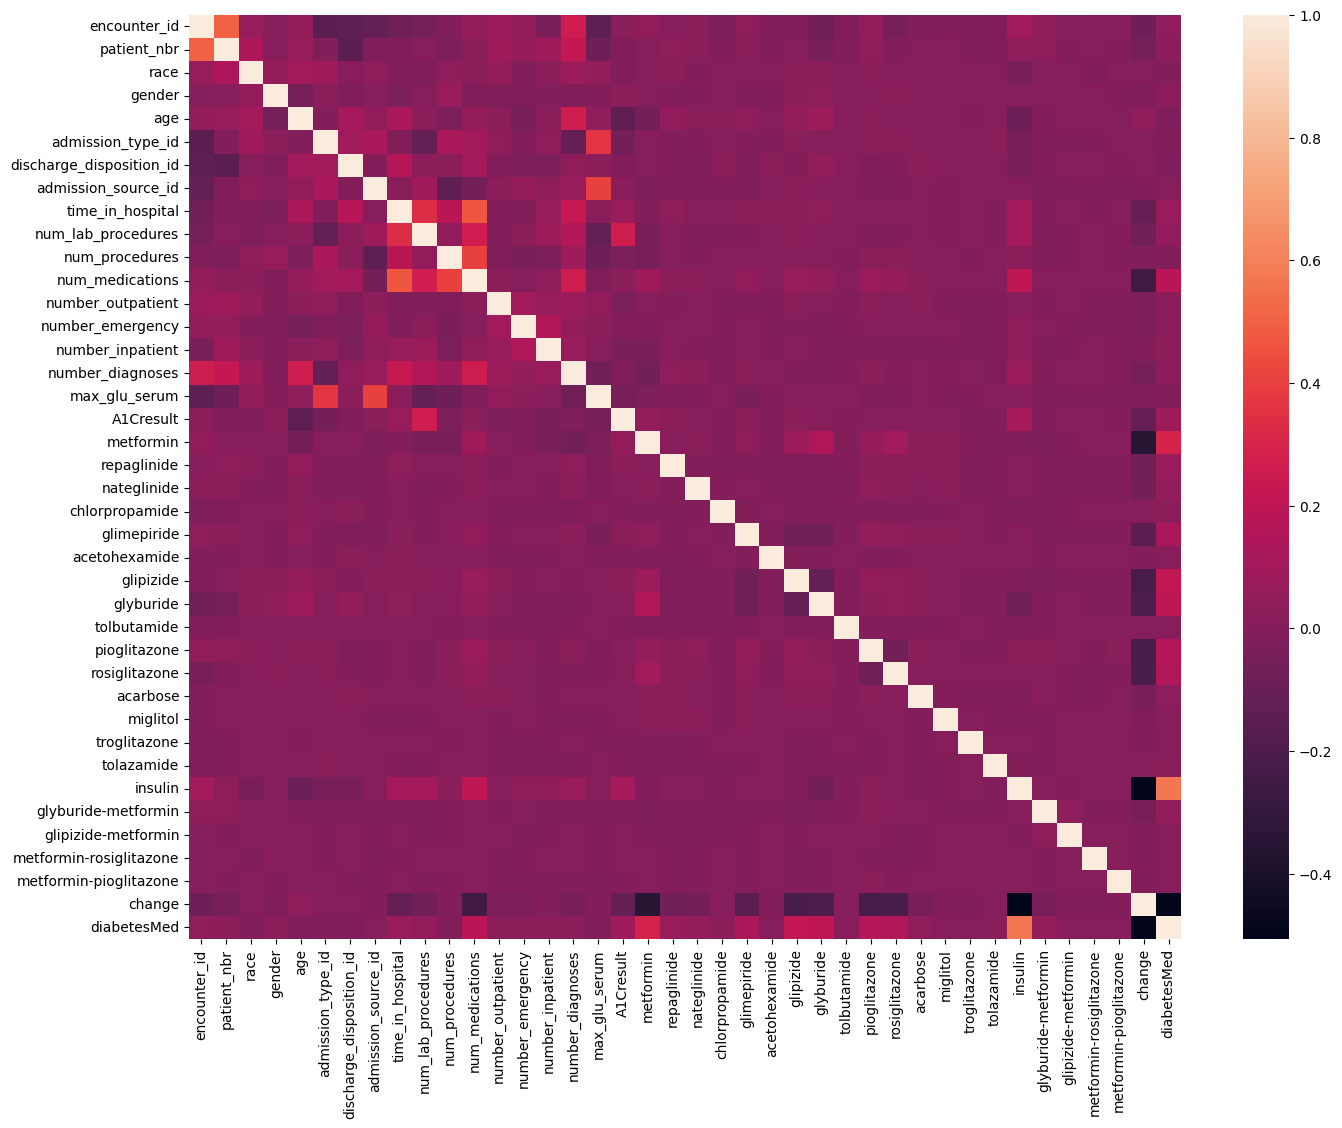

In [39]:
# creating a correlation map

fig, ax = plt.subplots(figsize=(16, 12))
diab4_corr = diab4.corr()
sns.heatmap(diab4_corr)

##Predictive models


### Importing metrics

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

### KNN - K-Nearest Neighbors algorithm

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [44]:
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)

In [45]:
# classification report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.10      0.05      0.06      1283
           1       0.40      0.39      0.39      4452
           2       0.65      0.71      0.67      8352

    accuracy                           0.55     14087
   macro avg       0.38      0.38      0.38     14087
weighted avg       0.52      0.55      0.53     14087



<Axes: >

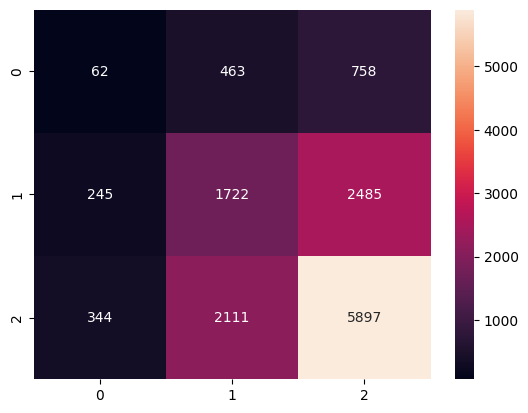

In [46]:
# confusion matrix
cm_knn=confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d')

### Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred_dt=dt.predict(X_train)

In [51]:
y_pred_dt_test=dt.predict(X_test)

In [52]:
# classification report
print(classification_report(y_train, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5013
           1       1.00      1.00      1.00     17790
           2       1.00      1.00      1.00     33545

    accuracy                           1.00     56348
   macro avg       1.00      1.00      1.00     56348
weighted avg       1.00      1.00      1.00     56348



In [53]:
# classification report
print(classification_report(y_test, y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.13      0.14      0.14      1283
           1       0.38      0.39      0.38      4452
           2       0.64      0.63      0.64      8352

    accuracy                           0.51     14087
   macro avg       0.39      0.39      0.39     14087
weighted avg       0.51      0.51      0.51     14087



<Axes: >

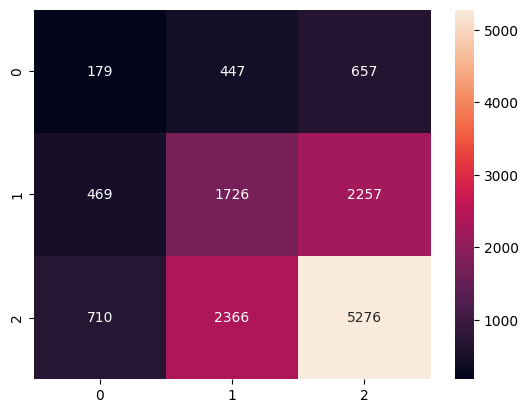

In [54]:
# confusion matrix
cm_dt=confusion_matrix(y_test, y_pred_dt_test)
sns.heatmap(cm_dt, annot=True, fmt='d')

In [55]:
dt.get_depth()

42

In [56]:
dt.get_n_leaves()

15812

In [57]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [58]:
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [59]:
y_pred_dt2_test=dt2.predict(X_test)

In [60]:
# classification report
print(classification_report(y_test, y_pred_dt2_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1283
           1       0.50      0.11      0.17      4452
           2       0.61      0.96      0.75      8352

    accuracy                           0.60     14087
   macro avg       0.37      0.36      0.31     14087
weighted avg       0.52      0.60      0.50     14087



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

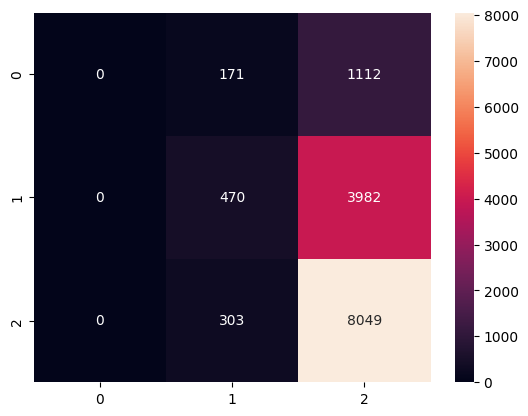

In [61]:
# confusion matrix
cm_dt2=confusion_matrix(y_test, y_pred_dt2_test)
sns.heatmap(cm_dt2, annot=True, fmt='d')

### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier()

In [64]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred_rfc=rfc.predict(X_train)

In [66]:
y_pred_rfc_test=rfc.predict(X_test)

In [67]:
# classification report
print(classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           0       0.48      0.01      0.02      1283
           1       0.52      0.32      0.39      4452
           2       0.65      0.88      0.75      8352

    accuracy                           0.63     14087
   macro avg       0.55      0.40      0.39     14087
weighted avg       0.59      0.63      0.57     14087



<Axes: >

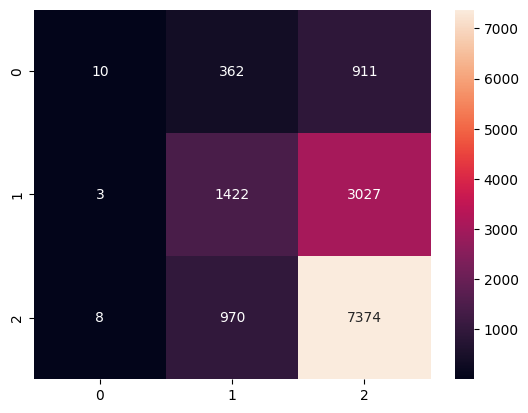

In [68]:
# confusion matrix
cm_rfc=confusion_matrix(y_test, y_pred_rfc_test)
sns.heatmap(cm_rfc, annot=True, fmt='d')

In [69]:
y.value_counts()   #unbalanced dataset, the SMOTE method will be used

2    41897
1    22242
0     6296
Name: readmitted, dtype: int64

## Predictive models after SMOTE

In [70]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=123)

In [71]:
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

In [72]:
y_train_smote.value_counts()

1    33545
2    33545
0    33545
Name: readmitted, dtype: int64

### KNN - K-Nearest Neighbors algorithm (after SMOTE)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2)

In [74]:
knn_smote=KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [75]:
knn_smote.fit(X_train_smote, y_train_smote)
knn_smote_pred=knn_smote.predict(X_test)

In [76]:
# classification report
print(classification_report(y_test, knn_smote_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78      6756
           1       0.72      0.74      0.73      6630
           2       0.78      0.57      0.66      6741

    accuracy                           0.73     20127
   macro avg       0.73      0.73      0.72     20127
weighted avg       0.73      0.73      0.72     20127



<Axes: >

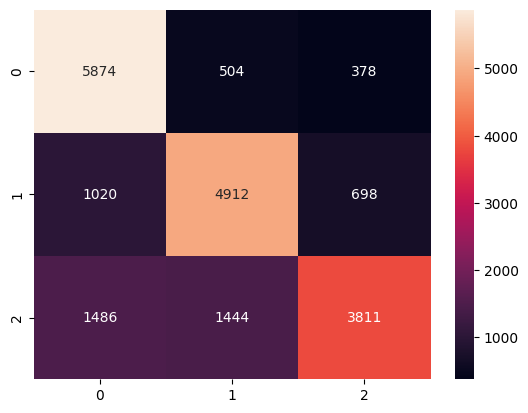

In [77]:
# confusion matrix
cm_knn_smote=confusion_matrix(y_test, knn_smote_pred)
sns.heatmap(cm_knn_smote, annot=True, fmt='d')

### Decision tree (after SMOTE)

In [78]:
dt_smote = DecisionTreeClassifier()

In [79]:
dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [80]:
y_pred_dt_smote=dt_smote.predict(X_train)

In [81]:
y_pred_dt_smote_test=dt_smote.predict(X_test)

In [82]:
# classification report
print(classification_report(y_train, y_pred_dt_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26789
           1       1.00      1.00      1.00     26915
           2       1.00      1.00      1.00     26804

    accuracy                           1.00     80508
   macro avg       1.00      1.00      1.00     80508
weighted avg       1.00      1.00      1.00     80508



In [83]:
dt_smote.get_depth()

50

In [84]:
dt_smote.get_n_leaves()

25755

In [85]:
dt2_smote = DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [86]:
dt2_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [87]:
dt2_smote.get_n_leaves()

14785

In [88]:
y_pred_dt2_smote_test=dt2_smote.predict(X_test)

In [89]:
# classification report
print(classification_report(y_test, y_pred_dt2_smote_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      6756
           1       0.84      0.76      0.79      6630
           2       0.89      0.89      0.89      6741

    accuracy                           0.85     20127
   macro avg       0.85      0.85      0.85     20127
weighted avg       0.85      0.85      0.85     20127



<Axes: >

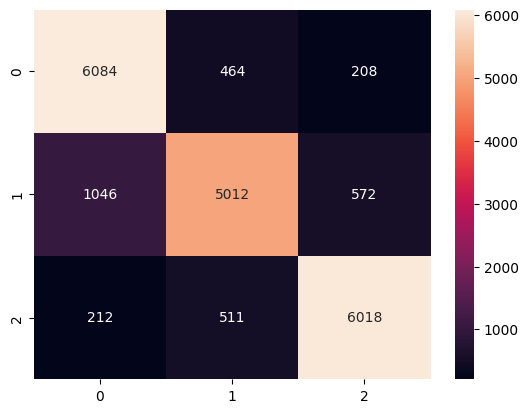

In [90]:
# confusion matrix
cm_dt2_smote=confusion_matrix(y_test, y_pred_dt2_smote_test)
sns.heatmap(cm_dt2_smote, annot=True, fmt='d')

### Random Forest Classifier (after SMOTE)

In [91]:
rfc_smote = RandomForestClassifier(n_estimators=3)

In [92]:
rfc_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=3)

In [93]:
y_pred_rfc_smote=rfc_smote.predict(X_train)

In [94]:
y_pred_rfc_smote_test=rfc_smote.predict(X_test)

In [95]:
# classification report
print(classification_report(y_test, y_pred_rfc_smote_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6756
           1       0.93      0.89      0.91      6630
           2       0.94      0.92      0.93      6741

    accuracy                           0.92     20127
   macro avg       0.92      0.92      0.92     20127
weighted avg       0.92      0.92      0.92     20127



<Axes: >

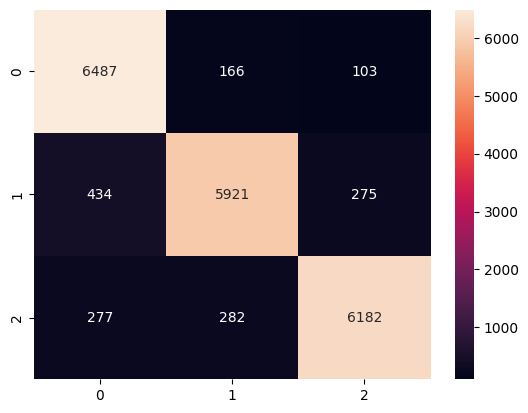

In [96]:
# confusion matrix
cm_rfc_smote=confusion_matrix(y_test, y_pred_rfc_smote_test)
sns.heatmap(cm_rfc_smote, annot=True, fmt='d')